In [136]:
import pandas as pd

cols = ['symboling', 'normalized-losses','make','fuel-type','aspiration',
       'num-of-doors','body-style','drive-wheels','engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
        'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Select numeric columns

Understand the meaning of each column and select the numeric columns which can be used as a feature for further usage.

In [137]:
# Understand the columns of dataset(https://archive.ics.uci.edu/ml/datasets/automobile)

numeric_cols=['normalized-losses','wheel-base','length','width',
            'height','curb-weight','engine-size','bore','stroke',
            'compression-ratio','horsepower','peak-rpm','city-mpg',
            'highway-mpg','price']

new_cars = cars[numeric_cols]
new_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Clean Data


### 1. Replace '?' with np.nan

In [138]:
import numpy as np
new_cars = new_cars.replace('?', np.nan)
new_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### 2. Change coulmns as numeric type

In [139]:
new_cars = new_cars.astype(float)

In [140]:
#new_cars.info()

### 3. Clean missing data

In [141]:
#'Price' is the target column to be predicted, so missing values 
# in this cloumn should be droped

new_cars = new_cars.dropna(subset=['price'])

In [142]:
# Other missing values can be handled by the imputation method 
new_cars = new_cars.fillna(new_cars.mean())

In [143]:
new_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [144]:
#new_cars

### 4. Normalizing data

In [145]:
# Using The min-max feature scaling:
price = new_cars['price']
new_cars = (new_cars - new_cars.min()) / (new_cars.max() - new_cars.min())
new_cars['price'] = price

In [146]:
new_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Train model

### Univariate model

Find the most related numeric columns with the knn model (k is default)

In [147]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(col, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    ## shuffle the orders of index
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    
    ## Split the dataset into train and test
    length = int(len(df) / 2)
    train  = df.iloc[0:length]
    test = df.iloc[length:]
    
    knn.fit(train[[col]], train['price'])
    predictions = knn.predict(test[[col]])
    rmse = np.sqrt(mean_squared_error(test['price'], predictions))

    return rmse

features = new_cars.drop(columns='price').columns
rmse = {}
for f in features:
    rmse[f] = knn_train_test(f, new_cars)
    

In [148]:
RMSE = pd.Series(rmse)
RMSE.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Under the default **k** value, the feature 'engine-size' performs best with the smallest RMSE value.

### Model with different k

In [149]:
from collections import OrderedDict

def knn_train_test(col, df):
    np.random.seed(1)
    
    ## shuffle the orders of index
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    
    ## Split the dataset into train and test
    length = int(len(df) / 2)
    train  = df.iloc[0:length]
    test = df.iloc[length:]
    
    k_value = [1,3,5,7,9]
    k_rmse = OrderedDict()
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors =k)
        knn.fit(train[[col]], train['price'])
        predictions = knn.predict(test[[col]])
        mse = mean_squared_error(test['price'], predictions)
        k_rmse[k] = np.sqrt(mse)

    return k_rmse

features = new_cars.drop(columns='price').columns

rmse_with_k = OrderedDict()

for col in features:
    rmse_with_k[col] = knn_train_test(col, new_cars)
    
rmse_with_k   

OrderedDict([('normalized-losses',
              OrderedDict([(1, 7846.750605148984),
                           (3, 7500.5698123109905),
                           (5, 7330.197653434445),
                           (7, 7756.421586234123),
                           (9, 7688.096096891432)])),
             ('wheel-base',
              OrderedDict([(1, 4493.734068810494),
                           (3, 5120.161506064513),
                           (5, 5461.553997873057),
                           (7, 5448.1070513823315),
                           (9, 5738.405685192312)])),
             ('length',
              OrderedDict([(1, 4628.45550121557),
                           (3, 5129.8358210721635),
                           (5, 5427.2009608367125),
                           (7, 5313.427720847974),
                           (9, 5383.054514833446)])),
             ('width',
              OrderedDict([(1, 4559.257297950061),
                           (3, 4606.413692169901),
           

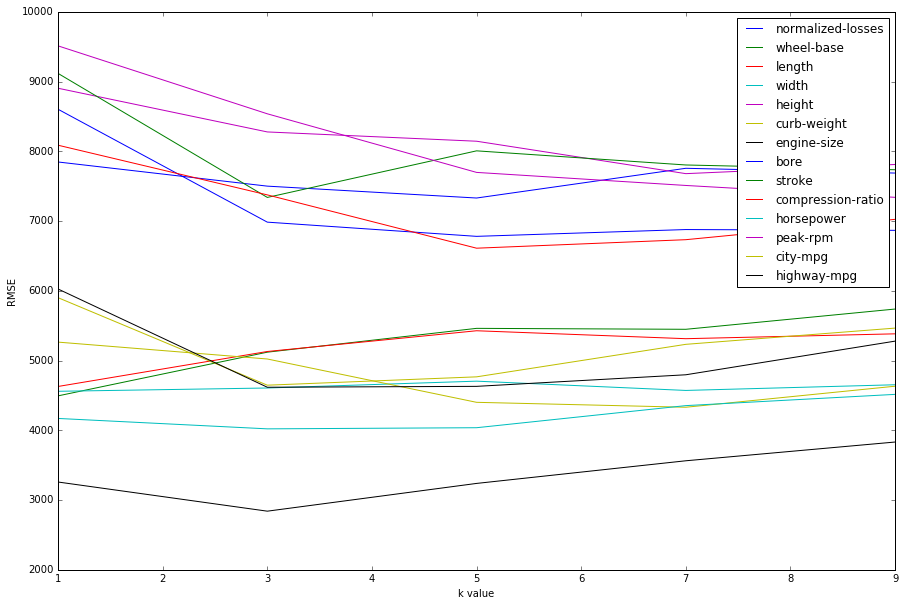

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
labels=[]

for k,v in rmse_with_k.items():
    x = list(v.keys())
    y = list(v.values())
    labels.append(k)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(labels,loc ='upper right')
    

### Multivariate model

In [151]:
feature_avg_rmse ={}

for k, val in rmse_with_k.items():
    feature_avg_rmse[k] = np.mean(list(val.values()))

feature_result = pd.Series(feature_avg_rmse)
feature_result = feature_result.sort_values()
feature_result

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [152]:
features_rank = list(feature_result.index)
features_rank

['engine-size',
 'horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-ratio',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

In [153]:
def knn_train_test(n, features, df):
    np.random.seed(1)
    
    ## shuffle the orders of index
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    
    ## Split the dataset into train and test
    length = int(len(df) / 2)
    train  = df.iloc[0:length]
    test = df.iloc[length:]
    
    col = features[:n]

    knn = KNeighborsRegressor()
    knn.fit(train[col], train['price'])
    predictions = knn.predict(test[col])
    mse = mean_squared_error(test['price'], predictions)
    rmse_feature = np.sqrt(mse)

    return rmse_feature

two_features = knn_train_test(2, features_rank, new_cars)
three_features = knn_train_test(3, features_rank, new_cars)
four_features = knn_train_test(4, features_rank, new_cars)
five_features = knn_train_test(5, features_rank, new_cars)
  

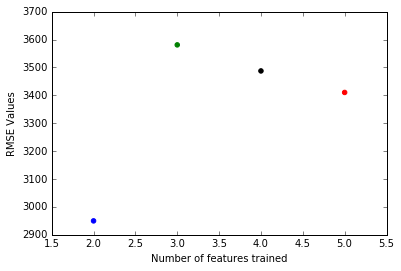

In [154]:
number = [2,3,4,5]
num_rmse = [two_features,three_features, four_features, five_features]
plt.scatter(number, num_rmse, color=['b','g','k','r'])
plt.xlabel('Number of features trained')
plt.ylabel('RMSE Values')

## Hyperparameter Tuning

Training the model with different features as well as various K values to select the best performance model

In [155]:
def knn_train_test(n,features,df):
    np.random.seed(1)
    
    ## shuffle the orders of index
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    
    ## Split the dataset into train and test
    length = int(len(df) / 2)
    train  = df.iloc[0:length]
    test = df.iloc[length:]
    
    cols = features[:n]
    k_values = [i for i in range(1,26)]
    k_rmse = OrderedDict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[cols], train['price'])
        predictions = knn.predict(test[cols])
        mse = mean_squared_error(test['price'], predictions)
        k_rmse[k] = np.sqrt(mse)

    return k_rmse



In [156]:
num_feature_k = {}

for num in range(2,6):
    num_feature_k['{} best features'.format(num)] = knn_train_test(
        num,features_rank, new_cars)


In [157]:
#num_feature_k

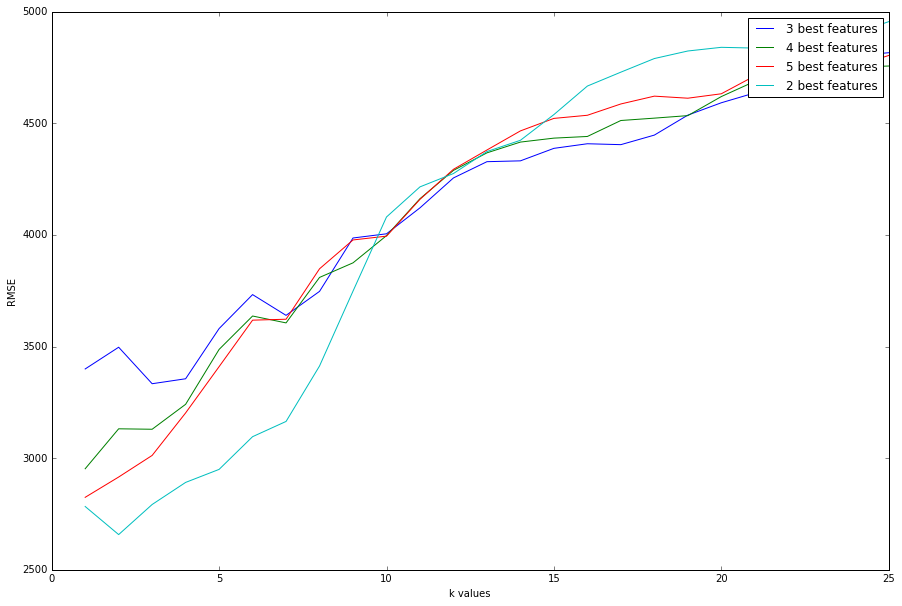

In [158]:
plt.figure(figsize=(15,10))
plt.xlabel('k values')
plt.ylabel('RMSE')
legends=[]

for k, val in num_feature_k.items():
    x = list(val.keys())
    y = list(val.values())
    legends.append(k)
    plt.plot(x,y)
    
plt.legend(legends)


According to the line chart above, the best performance point occurs when k= 2 and num_feature=2. 

## K-Fold model


In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [171]:
def knn_train_test(n, features,df):
    cols = features[:n]
    k_values = [i for i in range(1,21)]
    
    kf = KFold(n_splits = 10, shuffle=True, random_state=1)
    rmse_cv = OrderedDict()
## use the scoring = accuracy to get the predicted accuracy
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        mse =np.abs(cross_val_score(knn,df[cols],df['price'],
                        scoring='neg_mean_squared_error',cv=kf)).mean()
        rmse_cv[k] = np.sqrt(mse)

    return rmse_cv

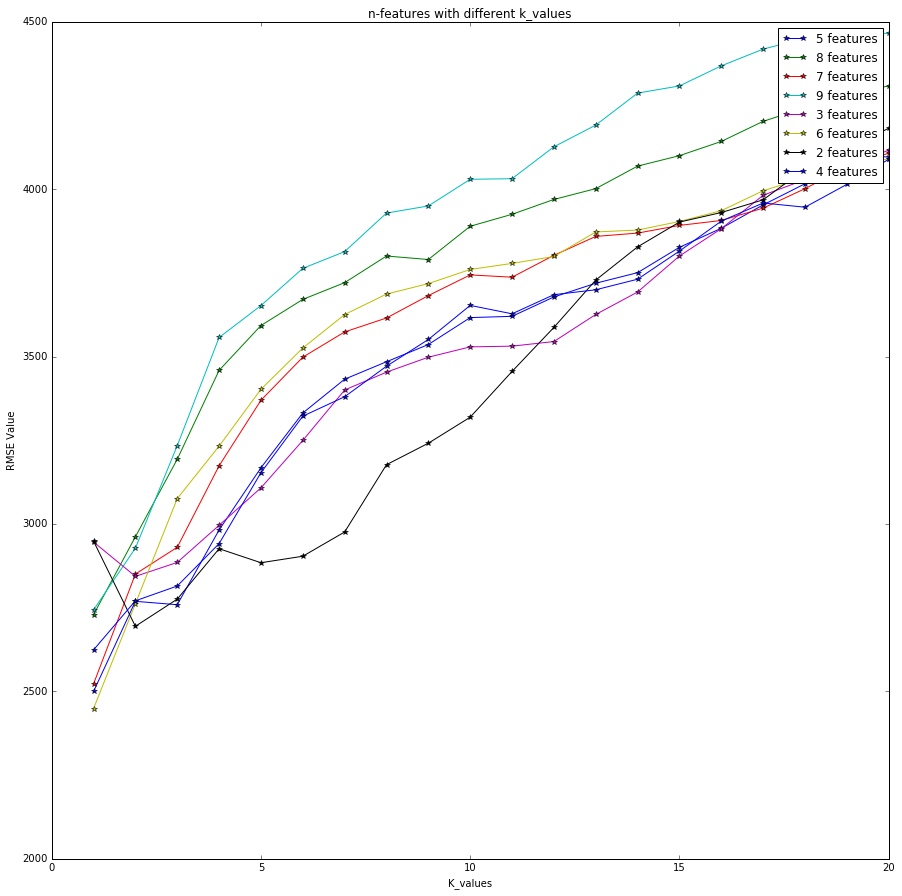

In [174]:
feature_cv_rmse = {}

for n in range(2,10):
    feature_cv_rmse['{} features'.format(n)] = knn_train_test(
        n, features_rank, new_cars)
    
plt.figure(figsize=(15,15))
labels=[] 

for k,val in feature_cv_rmse.items():  
        x = list(val.keys())
        y = list(val.values())
        plt.plot(x,y, marker='*')
        labels.append(k)

plt.title('n-features with different k_values')
plt.xlabel('K_values')
plt.ylabel('RMSE Value')
plt.legend(labels)

**Conclusions:**

When using the features 'engine-size' and 'horsepower' along with the k_value = 2 to train the knn model, we can get the most accurate predictions